In [1]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
# write your code here
import sqlite3
conn = sqlite3.connect('../db.sqlite3')
order = pd.read_sql_query("SELECT * FROM restaurant_order", conn)
order.to_csv('order.csv', index=False)
orderitem = pd.read_sql_query("SELECT * FROM restaurant_orderitem", conn)
orderitem.to_csv('orderitem.csv', index=False)
product = pd.read_sql_query("SELECT * FROM restaurant_product", conn)
product.to_csv('product.csv', index=False)
conn.close()


In [3]:
order = pd.read_csv('order.csv')
orderitem = pd.read_csv('orderitem.csv')
product = pd.read_csv('product.csv')

data = pd.merge(order, orderitem, left_on='id', right_on='order_id', how='inner')
data = pd.merge(data, product, left_on='product_id', right_on='id', how='inner')
data.to_csv('data.csv', index=False)
data 

,id_x,datetime,id_y,quantity,order_id,product_id,id,price,name
0,1,2019-08-03 20:25:00,1,2,1,6,6,0.80,Plain Papadum
1,4,2019-08-03 20:01:00,20,1,4,6,6,0.80,Plain Papadum
2,6,2019-08-03 19:42:00,32,1,6,6,6,0.80,Plain Papadum
3,7,2019-08-03 19:41:00,33,2,7,6,6,0.80,Plain Papadum
4,10,2019-08-03 19:26:00,49,4,10,6,6,0.80,Plain Papadum
...,...,...,...,...,...,...,...,...,...
74813,12376,2015-10-02 14:05:00,74688,1,12376,246,246,12.95,Kurma
74814,12890,2016-09-02 09:53:00,50998,1,12890,89,89,7.90,Chicken Chaat Main
74815,12929,2018-05-05 12:56:00,68396,1,12929,206,206,9.95,Mushroom - Prawn
74816,12929,2018-05-05 12:56:00,68397,1,12929,204,204,9.95,Methi - Prawn


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

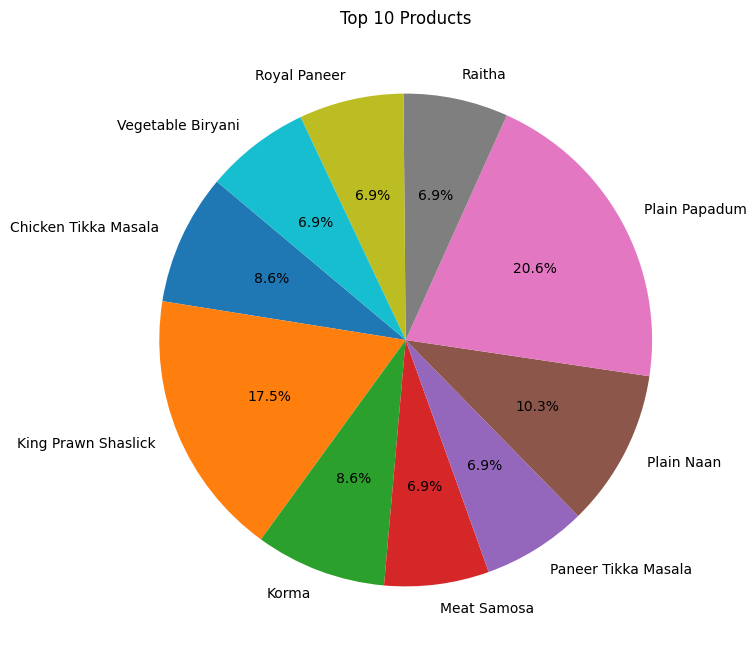

In [19]:
# write your code here
import matplotlib.pyplot as plt
pop = data.sort_values(by="quantity", ascending=False).head(11)
res = pop.groupby('name')['quantity'].sum()
proc = (res / res.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(proc, labels=res.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Products")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

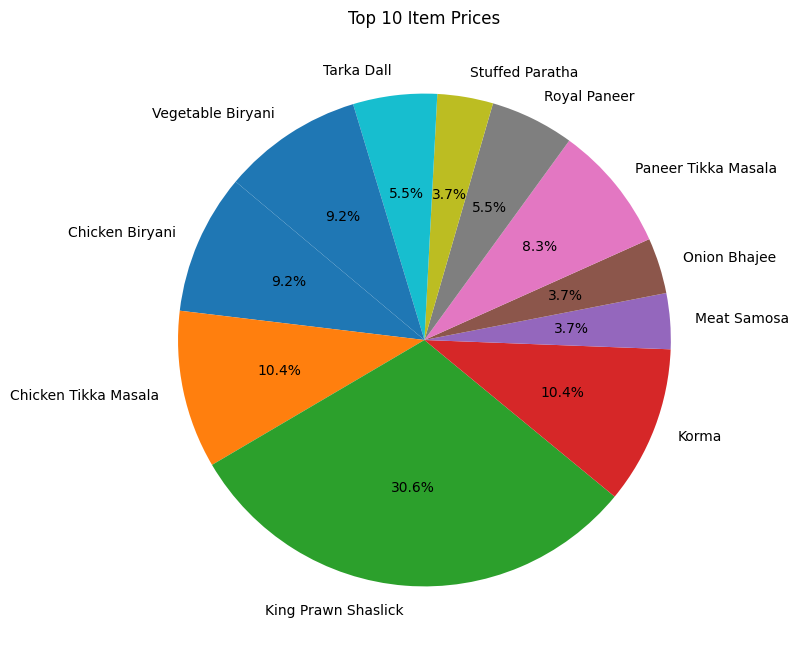

In [25]:
# write your code here
data["item_price"] = data["price"] * data["quantity"]
pop = data.sort_values(by="item_price", ascending=False).head(11)
res = pop.groupby('name')['item_price'].sum()
proc = (res / res.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(proc, labels=res.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Item Prices")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

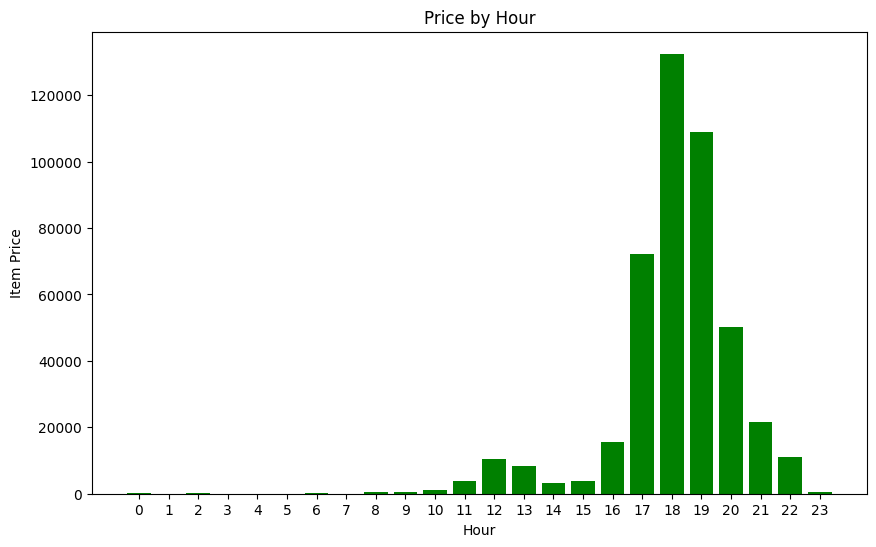

In [36]:
# write your code here
data["datetime"] = pd.to_datetime(data['datetime'])
data['order_hour'] = data['datetime'].dt.hour
res = data.groupby('order_hour')['item_price'].sum()

plt.figure(figsize=(10, 6))
plt.bar(res.index, res.values, color='green')
plt.xlabel("Hour")
plt.ylabel("Item Price")
plt.title("Price by Hour")
plt.xticks(range(0, 24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

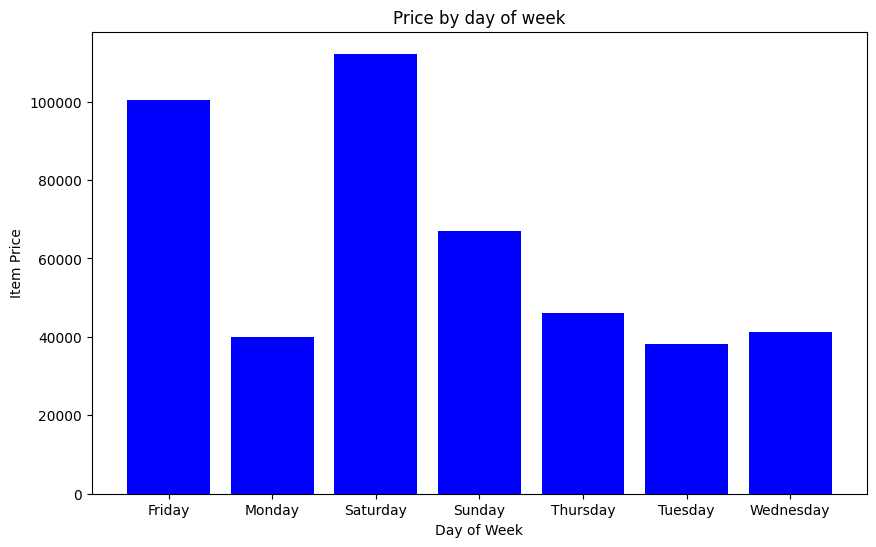

In [39]:
# write your code here
data["datetime"] = pd.to_datetime(data['datetime'])
data['order_day_of_week'] = data['datetime'].dt.dayofweek
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['order_day_of_week'] = data['order_day_of_week'].map(day)
res = data.groupby('order_day_of_week')['item_price'].sum()

plt.figure(figsize=(10, 6))
plt.bar(res.index, res.values, color='blue')
plt.xlabel("Day of Week")
plt.ylabel("Item Price")
plt.title("Price by day of week")
plt.show()